In [3]:
install.packages("dplyr")
install.packages("zoo")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
Warning message:
“Removed 99 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 99 rows containing missing values or values outside the scale range
(`geom_line()`).”


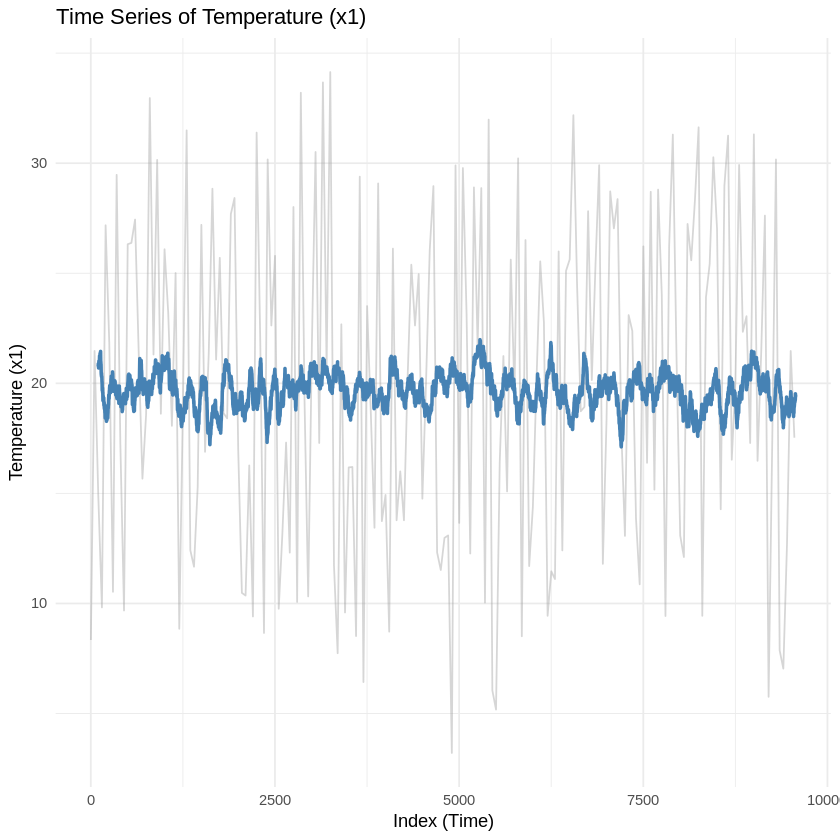

Warning message:
“Removed 99 rows containing missing values or values outside the scale range
(`geom_line()`).”


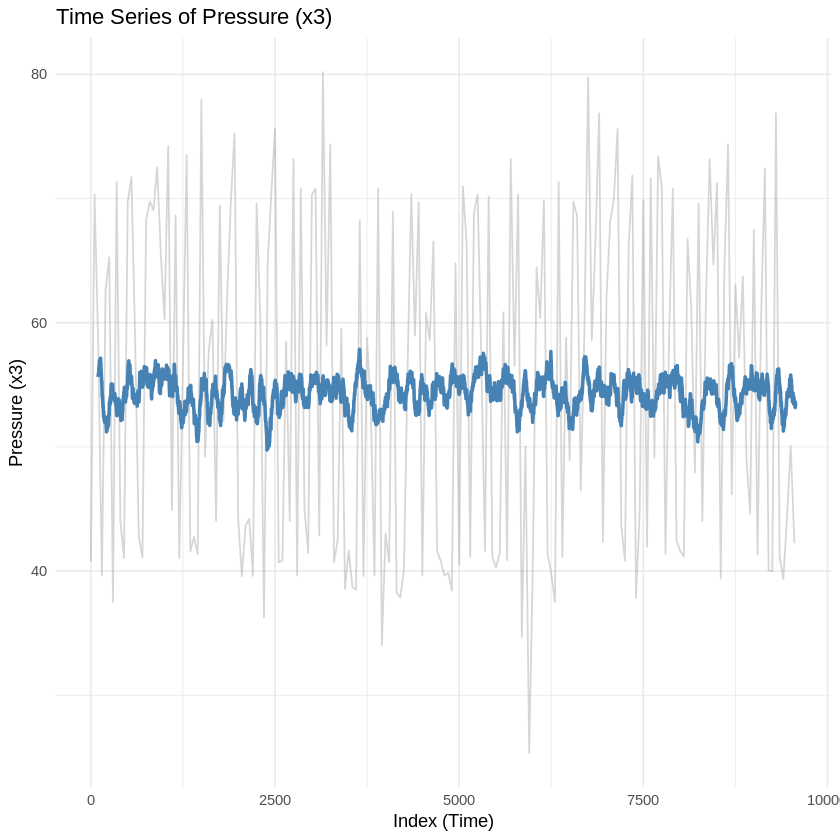

Warning message:
“Removed 99 rows containing missing values or values outside the scale range
(`geom_line()`).”


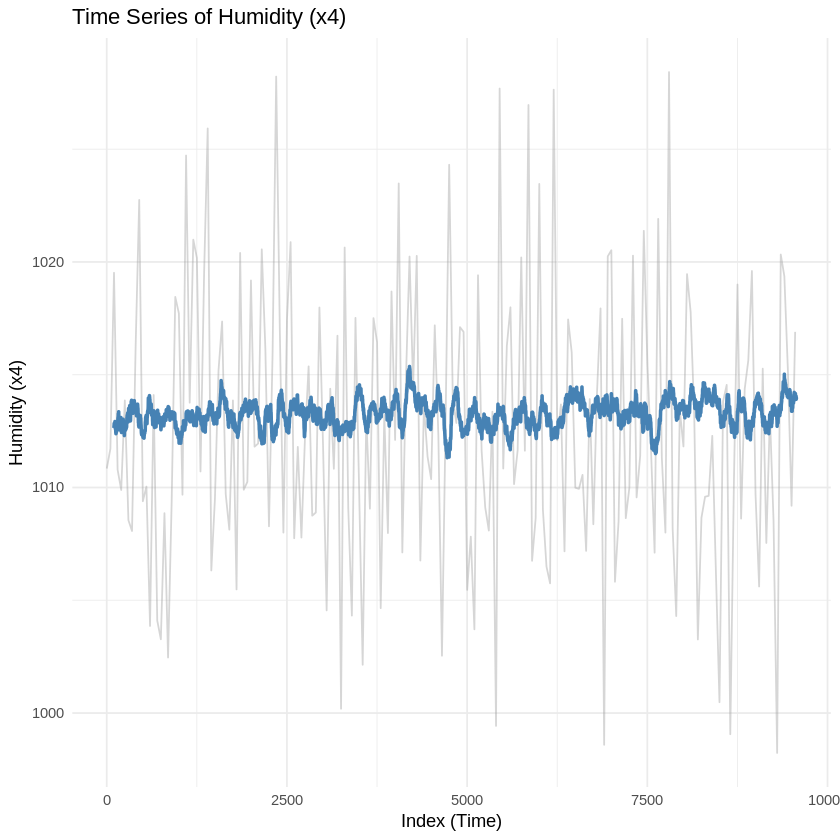

Warning message:
“Removed 99 rows containing missing values or values outside the scale range
(`geom_line()`).”


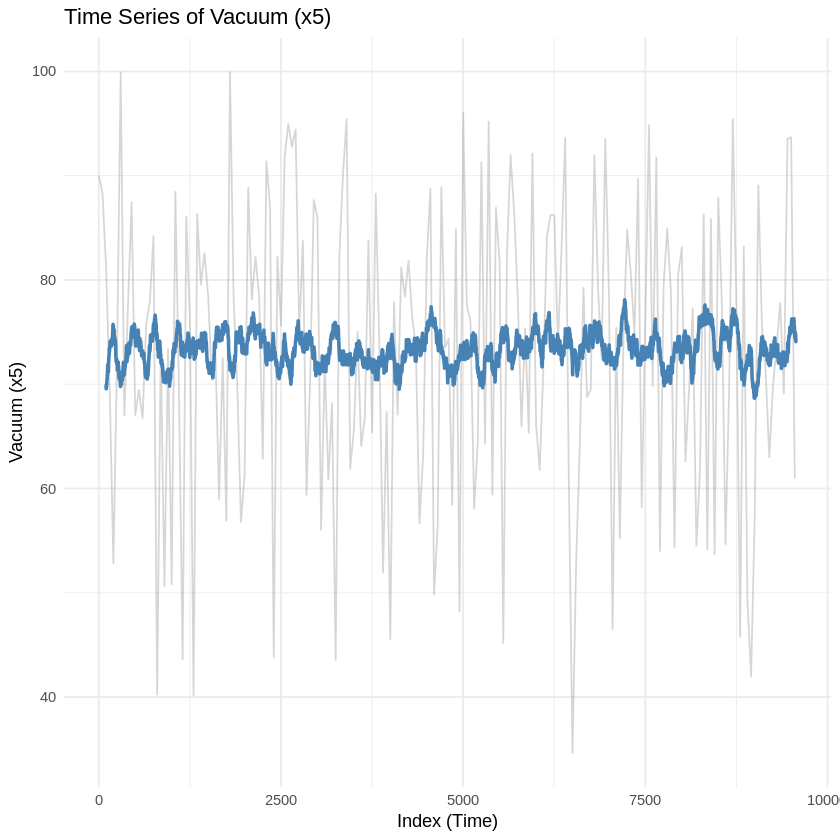

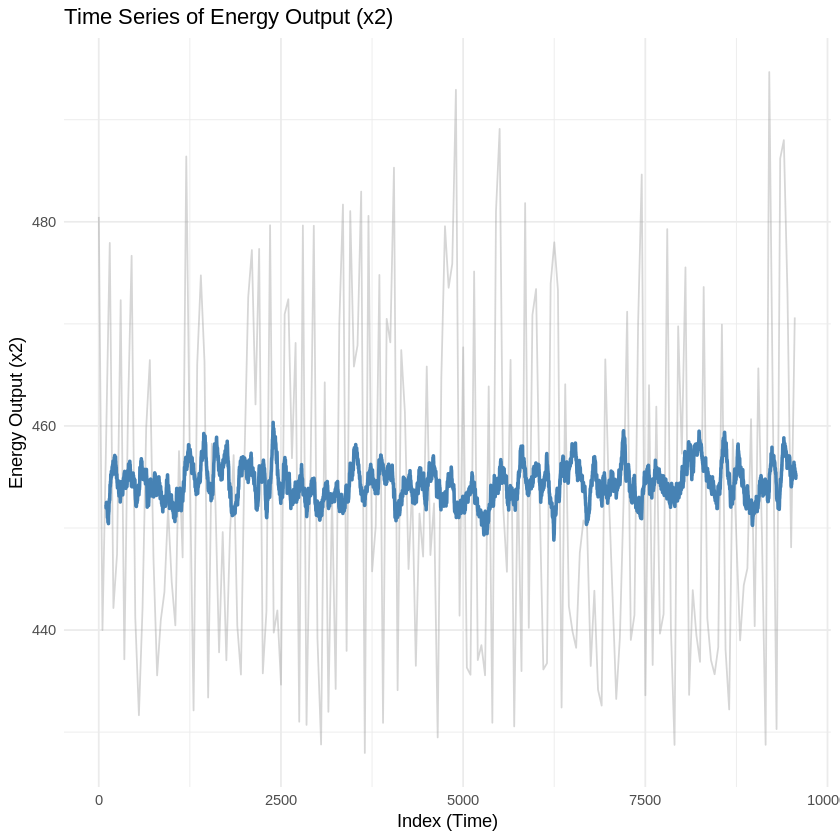

In [5]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(zoo)

# Load data
data <- read.csv("dataset.csv")
data$Index <- 1:nrow(data)

# Compute rolling means
data <- data %>%
  mutate(
    x1_sq = x1^2,
    x3_sq = x3^2,
    roll_x1 = rollmean(x1, k = 100, fill = NA, align = "right"),
    roll_x3 = rollmean(x3, k = 100, fill = NA, align = "right"),
    roll_x4 = rollmean(x4, k = 100, fill = NA, align = "right"),
    roll_x5 = rollmean(x5, k = 100, fill = NA, align = "right"),
    roll_x2 = rollmean(x2, k = 100, fill = NA, align = "right")
  )

# Sample every 50th row
data_sampled <- data[seq(1, nrow(data), by = 50), ]

# Define a plotting function
plot_variable <- function(raw_var, roll_var, var_label) {
  ggplot() +
    geom_line(data = data_sampled, aes_string(x = "Index", y = raw_var),
              color = "grey60", alpha = 0.4, linewidth = 0.5) +
    geom_line(data = data, aes_string(x = "Index", y = roll_var),
              color = "steelblue", linewidth = 1) +
    labs(title = paste("Time Series of", var_label),
         x = "Index (Time)", y = var_label) +
    theme_minimal()
}

# Generate plots
plot_x1 <- plot_variable("x1", "roll_x1", "Temperature (x1)")
plot_x3 <- plot_variable("x3", "roll_x3", "Pressure (x3)")
plot_x4 <- plot_variable("x4", "roll_x4", "Humidity (x4)")
plot_x5 <- plot_variable("x5", "roll_x5", "Vacuum (x5)")
plot_x2 <- plot_variable("x2", "roll_x2", "Energy Output (x2)")

# Print plots
print(plot_x1)
print(plot_x3)
print(plot_x4)
print(plot_x5)
print(plot_x2)
